In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-shows/netflix_titles.csv
/kaggle/input/netflix-image/gsmarena_002.jpg
/kaggle/input/netflix-titlescsv/netflix_titles.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe(include ="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [5]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [6]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

<Axes: ylabel='type'>

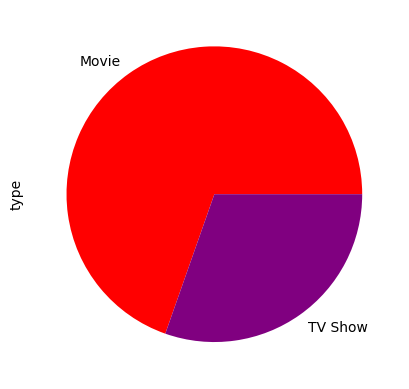

In [7]:
colors = ['red', 'purple', 'orange'] 
df['type'].value_counts().plot(kind='pie', colors=colors)


In [8]:
result = df.groupby("release_year").agg({"type":"count"})
styled_result = result.style.set_table_styles([
    {'selector': 'th',
     'props': [('border', '1px solid black')]},
    {'selector': 'td','props': [('border', '1px solid black')]}
])
styled_result

,type
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
1946,2
1947,1
1954,2
1955,3


In [9]:
df .isnull() .sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

<Axes: >

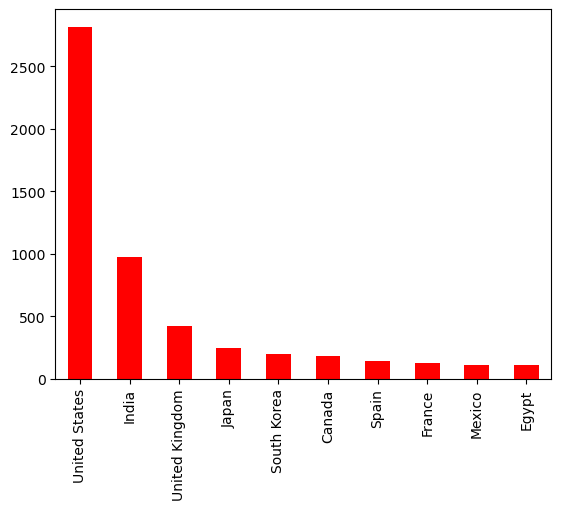

In [11]:
df.country.value_counts()[:10].plot(kind="bar", color='red')

In [12]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<Axes: ylabel='rating'>

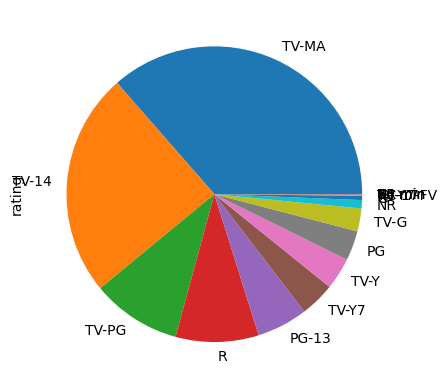

In [13]:
df.rating.value_counts().plot(kind='pie')

In [14]:
df[df['type']=="Movie"]['duration'].value_counts().sort_values(ascending=False)[:20]

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
95 min     137
96 min     130
92 min     129
102 min    122
98 min     120
99 min     118
88 min     116
101 min    116
103 min    114
106 min    111
100 min    108
89 min     106
104 min    104
86 min     103
105 min    101
Name: duration, dtype: int64

<Axes: >

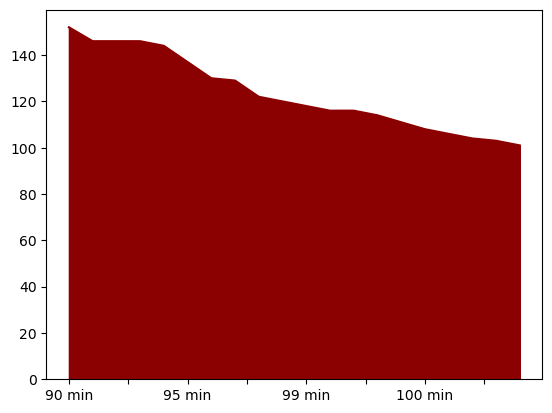

In [15]:
df[df['type']=="Movie"]['duration'].value_counts().sort_values(ascending=False)[:20].plot(kind="area", color='darkred')

In [16]:
df[df['type']=="TV Show"]['duration'].value_counts().sort_values(ascending=False)[:20]


1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

<Axes: >

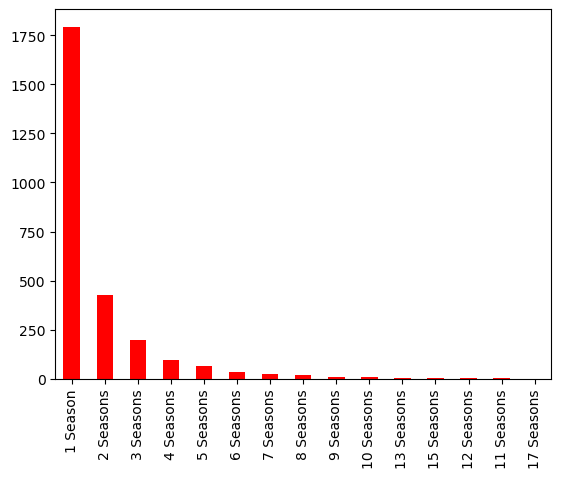

In [17]:
df[df['type']=="TV Show"]['duration'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar", color='red')

In [18]:
df['director'].value_counts().sort_values(ascending=False)[:20]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Troy Miller                8
Hakan Algül                8
Robert Rodriguez           8
Fernando Ayllón            8
Shannon Hartman            8
Johnnie To                 8
Ryan Polito                8
Kunle Afolayan             8
Name: director, dtype: int64

<Axes: >

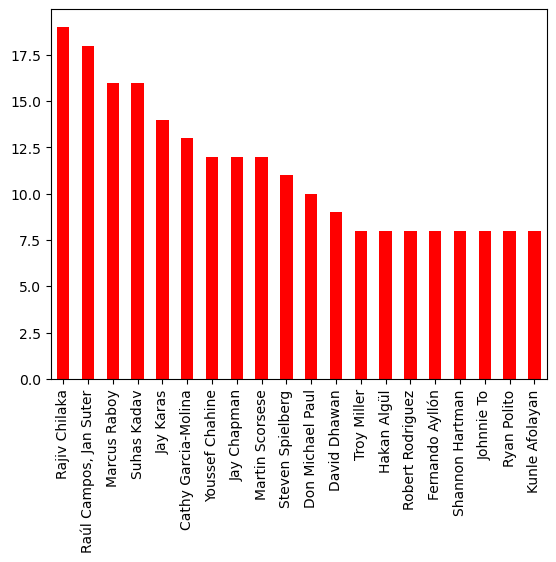

In [19]:
df['director'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar', color='red')

In [20]:
list_types = []
for row,items in df.iterrows():
    for item in items['listed_in'].split(','):
        if item.strip() not in list_types:
            list_types.append(item.strip())
            

In [21]:
list_types,len(list_types)

(['Documentaries',
  'International TV Shows',
  'TV Dramas',
  'TV Mysteries',
  'Crime TV Shows',
  'TV Action & Adventure',
  'Docuseries',
  'Reality TV',
  'Romantic TV Shows',
  'TV Comedies',
  'TV Horror',
  'Children & Family Movies',
  'Dramas',
  'Independent Movies',
  'International Movies',
  'British TV Shows',
  'Comedies',
  'Spanish-Language TV Shows',
  'Thrillers',
  'Romantic Movies',
  'Music & Musicals',
  'Horror Movies',
  'Sci-Fi & Fantasy',
  'TV Thrillers',
  "Kids' TV",
  'Action & Adventure',
  'TV Sci-Fi & Fantasy',
  'Classic Movies',
  'Anime Features',
  'Sports Movies',
  'Anime Series',
  'Korean TV Shows',
  'Science & Nature TV',
  'Teen TV Shows',
  'Cult Movies',
  'TV Shows',
  'Faith & Spirituality',
  'LGBTQ Movies',
  'Stand-Up Comedy',
  'Movies',
  'Stand-Up Comedy & Talk Shows',
  'Classic & Cult TV'],
 42)

In [22]:
df['listed_in'].value_counts()[:20]

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

In [23]:
nums = [0]*len(list_types)
for row,items in df.iterrows():
    for item in items['listed_in'].split(","):
        index = list_types.index(item.strip())
        nums[index]+=1
        

In [24]:
df_listing = pd.DataFrame({"Type":list_types,"Count":nums})
df_listing.sort_values(by="Count")

,Type,Count
35,TV Shows,16
41,Classic & Cult TV,28
40,Stand-Up Comedy & Talk Shows,56
39,Movies,57
23,TV Thrillers,57
36,Faith & Spirituality,65
33,Teen TV Shows,69
34,Cult Movies,71
28,Anime Features,71
10,TV Horror,75


<Axes: xlabel='Type'>

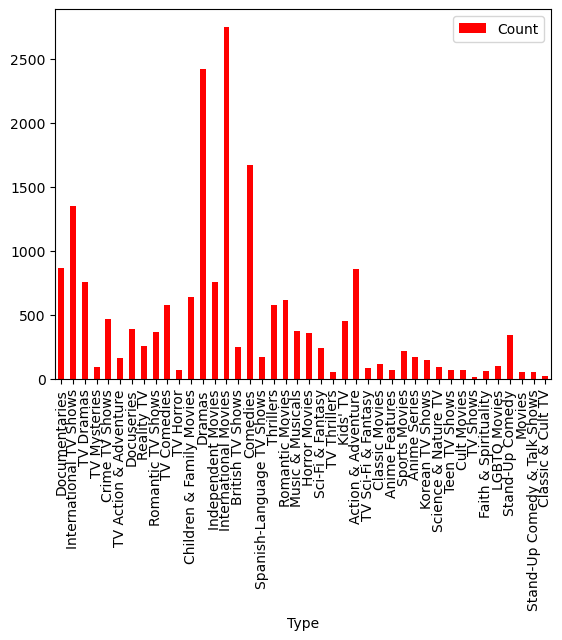

In [25]:
df_listing.plot(kind='bar', x='Type', y='Count', color='red')

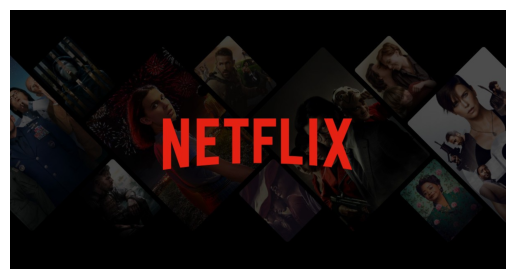

In [26]:
image_path = '/kaggle/input/netflix-image/gsmarena_002.jpg'

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axAis numbers and ticks
plt.show()